In [1]:
import sys; sys.path.append('..') # Add source directory

In [2]:
import pandas as pd
import matplotlib

In [3]:
from supermarket_customer_behavior.paths import day_data_file_path, WeekDay
from supermarket_customer_behavior.data import load_all, load_day, add_entry_exit, customers_by_location, compute_customer_time_in_store, compute_customer_total, filter_non_exiting_customers

# Load Data

## All

In [7]:
df_all = load_all()
df_all = add_entry_exit(df_all)
df_all = filter_non_exiting_customers(df_all)
df_all

,timestamp,customer_no,location,entry,exit,customer_count_change
0,2019-09-02 07:03:00,monday_1,dairy,True,False,1
1,2019-09-02 07:03:00,monday_2,dairy,True,False,1
2,2019-09-02 07:04:00,monday_3,dairy,True,False,1
3,2019-09-02 07:04:00,monday_4,dairy,True,False,1
4,2019-09-02 07:04:00,monday_5,spices,True,False,1
...,...,...,...,...,...,...
24793,2019-09-06 21:48:00,friday_1508,dairy,True,False,1
24794,2019-09-06 21:48:00,friday_1501,checkout,False,True,-1
24795,2019-09-06 21:48:00,friday_1504,checkout,False,True,-1
24796,2019-09-06 21:50:00,friday_1508,checkout,False,True,-1


## By Day

In [5]:
df = load_day(WeekDay.MONDAY)
df = add_entry_exit(df)
df = filter_non_exiting_customers(df)
df

,index,timestamp,customer_no,location,entry,exit,customer_count_change
0,0,2019-09-02 07:03:00,1,dairy,True,False,1
1,1,2019-09-02 07:03:00,2,dairy,True,False,1
2,2,2019-09-02 07:04:00,3,dairy,True,False,1
3,3,2019-09-02 07:04:00,4,dairy,True,False,1
4,4,2019-09-02 07:04:00,5,spices,True,False,1
...,...,...,...,...,...,...,...
4856,4869,2019-09-02 21:48:00,1431,checkout,False,True,-1
4857,4871,2019-09-02 21:48:00,1434,checkout,False,True,-1
4858,4874,2019-09-02 21:48:00,1444,spices,True,False,1
4859,4879,2019-09-02 21:49:00,1442,checkout,False,True,-1


# Customers by Locations

In [21]:
customers_by_location(df).head(3)

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,0,2,0,0,0
2019-09-02 07:04:00,0,2,0,1,3
2019-09-02 07:05:00,2,1,1,0,0


## Checkout

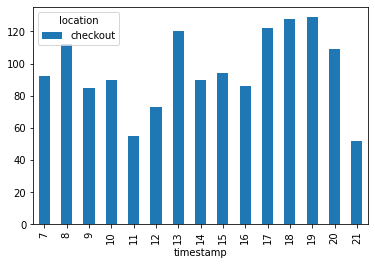

In [19]:
checkout_customer_count = customers_by_location(df, locations="checkout")
checkout_customer_count.groupby(checkout_customer_count.index.hour).sum().plot.bar()

# Customer Time in Store

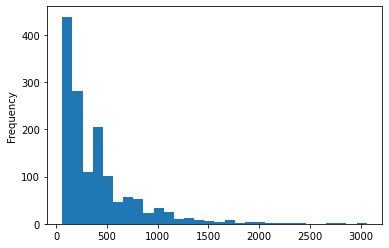

In [21]:
compute_customer_time_in_store(df).astype('timedelta64[s]').plot.hist(bins=30)

# Total Number of Customers


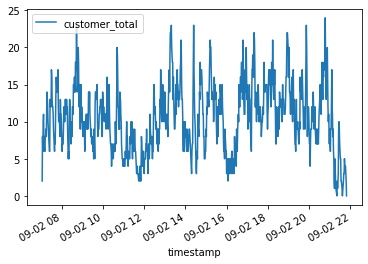

In [6]:
compute_customer_total(df).plot()

# First Location vs Later Locations 

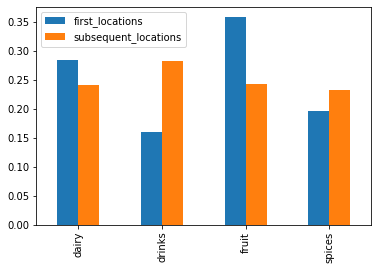

In [37]:
locations = pd.DataFrame({
    "first_locations": df.loc[df["entry"], "location"].value_counts(normalize=True),
    "subsequent_locations": df.loc[~df["entry"] & ~(df["location"] == "checkout"), "location"].value_counts(normalize=True)
})
locations.plot.bar()